In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [27]:
#reshape hình ảnh
def remake_img(img):
  height, width = img.size
  return np.reshape(img, (width * height, 3)).astype(int) # biến đổi bức ảnh thành 1 ma trận mà mỗi hàng là 1 pixel với 3 giá trị màu

# tô màu cho hình ảnh dựa theo centroid và label
def color_img(centroids, labels, img):
  height, width = img.size
  compressed = centroids[labels.astype(int)]
  compressed = compressed.reshape((width, height, 3)).astype(int)
  return compressed

In [28]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
  # khởi tạo centroids theo 2 cách
  length, dim = img_1d.shape
  if init_centroids == 'random':
    centroids = np.random.choice(256, size = (k_clusters, dim), replace=False)
  elif init_centroids == 'in_pixels':
    centroids = img_1d[np.random.choice(length, size = k_clusters, replace=False)]

  labels = np.zeros(shape=(length))

  while max_iter:
    for i in range(length):
      min_dist = float('inf')

      # tính khoảng cách euclid từ 1 điểm trên ảnh đến centroid
      for j in range(k_clusters):
        mean_dist = np.sqrt(np.sum((img_1d[i] - centroids[j])**2, axis=0)) #tính tbc các giá trị khoảng cách
        if mean_dist < min_dist: #tìm khoảng cách nhỏ nhất
          min_dist = mean_dist 
          labels[i] = j 

    # cập nhật lại centorid
    for i in range(k_clusters):
      pixels = img_1d[labels == i]
      if len(pixels):
        centroids[i] = np.mean(pixels, axis = 0)
    max_iter -= 1

  return centroids, labels

In [29]:
def main():
  # Input các giá trị
  img_name = input("Enter image's name: ")
  max_iter = int(input("Enter max iteration: "))
  k_cluster = int(input("Number of k cluster: "))
  centroidsT = int(input("Initial centroid: (1.random, 2.in_pixels): "))

  # chọn centroid
  if centroidsT == 1:
    centroids_type = 'random'
  elif centroidsT == 2:
    centroids_type = 'in_pixels'
  else:
    print('Invalid centroid initialization method')
    return

  # mở hình ảnh
  init_img = Image.open(img_name).convert('RGB')
  
  # xử lí hình ảnh
  flat_img = remake_img(init_img)

  # tính toán
  centroids, labels = kmeans(flat_img, k_cluster, max_iter, centroids_type)
  new_img = color_img(centroids, labels, init_img)
  new_img = Image.fromarray(new_img.astype('uint8'), 'RGB')

  choice = int(input('Enter output file type: (1.png, 2.pdf): '))

  # lưu ảnh
  if choice == 1:
    new_img.save(img_name+"_"+centroids_type+"_"+str(k_cluster)+'_colors_'+str(max_iter)+"times_compressed.png","PNG")
  elif choice == 2:
    new_img.save(img_name+"_"+centroids_type+"_"+str(k_cluster)+'_colors_'+str(max_iter)+"times_compressed.pdf","PDF")
  else:
    print("Invalid file save type!")
    return

  # xem ảnh
  plt.title(f'original image')
  plt.imshow(init_img) 
  plt.show()

  plt.title(f'compressed image')
  plt.imshow(new_img)
  plt.show


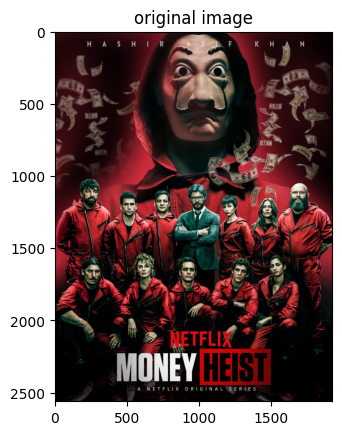

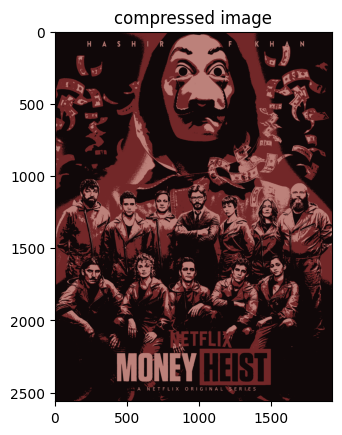

In [30]:
main()